In [2]:
# tag of a word depends on the word and its context within a sentence. 
# For this reason, we will be working with data at the level of (tagged) sentences rather than words.
# In early stage of data processing same tag (most likely occuring) will be assigned to each token. 
# To assign default tagger for each toekn, NLTK provides nltk.DefaultTagger()
# when we wil be processing the several thousands words most words will be new and will be nouns
# Default tagger helps to improve the robustness of a language processing system

import nltk
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print('raw tagged: ', default_tagger.tag(tokens))

# But evaluating default tagger performance on typical corpus gives poor results (0.13 - 1out of 8 is correct)
print('\nEvaluating default tagger on brown corpus: ', default_tagger.evaluate(brown_tagged_sents)) 

raw tagged:  [('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]

Evaluating default tagger on brown corpus:  0.13089484257215028


In [23]:
# regular expression tagger - assigns tags to tokens on the basis of matching patterns
# processed in order, first match will be assigned

patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),   # simple past
    (r'.*es$', 'VBZ'),   # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),    # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN')        # nouns (default)
   ]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])
regexp_tagger.evaluate(brown_tagged_sents) # 1 out of 5 tags is correct tagged

0.20326391789486245

In [4]:
# Look-up tagger or NLTK UnigramTagger
# Lot of high frequency words do not have NN tags
# Find out 100 most frequent words, store their most likely tag, then use this information as 'lookup tagger'
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:50]  #increasing the most frequent words count increases the evaluation value
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
# likely_tags
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
print('\n baseline_tagger.evaluate(brown_tagged_sents) :',baseline_tagger.evaluate(brown_tagged_sents))

# use the lookup table first, and if it is unable to assign a tag, then use the default tagger, a process known as backoff
# will see what baseline tagger will do for untagged input text, 
sent = brown.sents(categories='news')[3]
# many tokens assigned with 'None', for these assign tag as 'NN'
print('\nbaseline tagger applied to brown sentense')
print(baseline_tagger.tag(sent))   

baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))
print('\nbaseline tagger with backoff applied to brown sentense')
print(baseline_tagger.tag(sent))


 baseline_tagger.evaluate(brown_tagged_sents) : 0.2743501004435428

baseline tagger applied to brown sentense
[('``', '``'), ('Only', None), ('a', None), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', None), ('city', None), ("''", "''"), ('.', '.')]

baseline tagger with backoff applied to brown sentense
[('``', '``'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'IN'), ('such', 'NN'), ('reports', 'NN'), ('was', 'BEDZ'), ('received', 'NN'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'

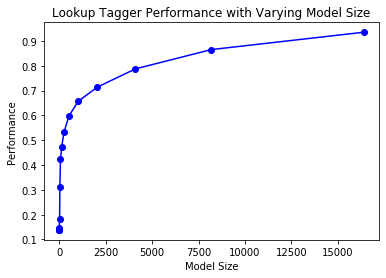

In [34]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    #wordlist = ['The', 'Fulton', 'County', 'Grand']
    #cfd = {('The': FreqDist({'AT': 775, 'AT-TL': 28, 'AT-HL': 3})), ('Fulton': FreqDist({'NP-TL': 10, 'NP': 4})), 
    #       ('County': FreqDist({'NN-TL': 35})), ('Grand': FreqDist({'JJ-TL': 5, 'FW-JJ-TL': 1}))}
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)  # 2 ** array[0, 1, 2, 3 ...14]  = array[1, 2, 4, 8, ...16384]
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()

In [43]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
print("cfd['The'].max() : ",cfd['The'].max())
print('\n'cfd.items())


cfd['The'].max() :  AT
dict_items([('The', FreqDist({'AT': 775, 'AT-TL': 28, 'AT-HL': 3})), ('Fulton', FreqDist({'NP-TL': 10, 'NP': 4})), ('County', FreqDist({'NN-TL': 35})), ('Grand', FreqDist({'JJ-TL': 5, 'FW-JJ-TL': 1})), ('Jury', FreqDist({'NN-TL': 2})), ('said', FreqDist({'VBD': 382, 'VBN': 20})), ('Friday', FreqDist({'NR': 41})), ('an', FreqDist({'AT': 300})), ('investigation', FreqDist({'NN': 9})), ('of', FreqDist({'IN': 2716, 'IN-TL': 128, 'IN-HL': 5})), ("Atlanta's", FreqDist({'NP$': 4})), ('recent', FreqDist({'JJ': 20})), ('primary', FreqDist({'NN': 13, 'JJ': 4})), ('election', FreqDist({'NN': 38})), ('produced', FreqDist({'VBD': 5, 'VBN': 1})), ('``', FreqDist({'``': 732})), ('no', FreqDist({'AT': 104, 'RB': 5})), ('evidence', FreqDist({'NN': 17})), ("''", FreqDist({"''": 702})), ('that', FreqDist({'CS': 545, 'WPS': 127, 'DT': 124, 'QL': 5, 'WPO': 1})), ('any', FreqDist({'DTI': 90})), ('irregularities', FreqDist({'NNS': 3})), ('took', FreqDist({'VBD': 47})), ('place', FreqDi

In [40]:
words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
words_by_freq

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'jury',
 'further',
 'in',
 'term-end',
 'presentments',
 'the',
 'City',
 'Executive',
 'Committee',
 ',',
 'which',
 'had',
 'over-all',
 'charge',
 'deserves',
 'praise',
 'and',
 'thanks',
 'Atlanta',
 'for',
 'manner',
 'was',
 'conducted',
 'September-October',
 'term',
 'been',
 'charged',
 'by',
 'Superior',
 'Court',
 'Judge',
 'Durwood',
 'Pye',
 'to',
 'investigate',
 'reports',
 'possible',
 'hard-fought',
 'won',
 'Mayor-nominate',
 'Ivan',
 'Allen',
 'Jr.',
 'Only',
 'a',
 'relative',
 'handful',
 'such',
 'received',
 'considering',
 'widespread',
 'interest',
 'number',
 'voters',
 'size',
 'this',
 'city',
 'it',
 'did',
 'find',
 'many',
 "Georgia's",
 'registration',
 'laws',
 'are',
 'outmoded',
 'or',
 'inadeq